In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

In [18]:
df = pd.read_csv(r'C:\Users\harr1\Desktop\Thinkful\suicide data.csv')
print (df.head(10))

   country  year     sex          age  suicides_no  population  \
0  Albania  1987    male  15-24 years           21      312900   
1  Albania  1987    male  35-54 years           16      308000   
2  Albania  1987  female  15-24 years           14      289700   
3  Albania  1987    male    75+ years            1       21800   
4  Albania  1987    male  25-34 years            9      274300   
5  Albania  1987  female    75+ years            1       35600   
6  Albania  1987  female  35-54 years            6      278800   
7  Albania  1987  female  25-34 years            4      257200   
8  Albania  1987    male  55-74 years            1      137500   
9  Albania  1987  female   5-14 years            0      311000   

   suicides/100k pop country-year  HDI for year  gdp_for_year ($)   \
0               6.71  Albania1987           NaN      2,156,624,900   
1               5.19  Albania1987           NaN      2,156,624,900   
2               4.83  Albania1987           NaN      2,156,624,

In [3]:
#Research questions that would be interesting to look at:
#1.Are males or females more likely to commit suicide
#2.What country has the highest suicide rate per capita?
#3.Does GDP show an inverse correlation with suicide rates: Do poorer countries have increased suicide rates?
#4.Are suicide rates increasing globally with time?
#5.What generation is most affected by suicide?

In [4]:
#Outcome (reference?) variable: suicide_no     
#Categorical variables: sex, country, generation
#Continuous variables: suicides/100k pop, gdp_per_capita ($), year

In [5]:
#Univariate exploration:
#    How many variables are there? : 12 total, 6 to answer my questions
#    How many data points: 27820
#    Which variables are continous vs categorical: see above
#    Do any of my variables have a known probability distribution? [What do you do when hist take forever?]
#    Do I have missing data: Not in my variables
#    How much variance is there in the variables? Since suicide is ordinal (They did it or they didn't), does it 
            #count as variance?

In [4]:
print (len(df))

27820


In [5]:
print(df.isna().sum())

country                   0
year                      0
sex                       0
age                       0
suicides_no               0
population                0
suicides/100k pop         0
country-year              0
HDI for year          19456
 gdp_for_year ($)         0
gdp_per_capita ($)        0
generation                0
dtype: int64


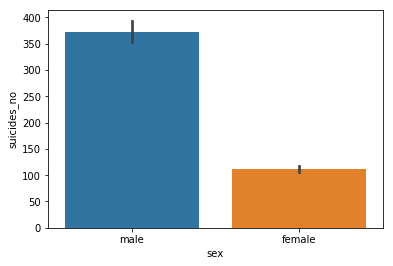

In [24]:
#sex vs generation
ax = sns.barplot(x='sex', y='suicides_no', data = df)

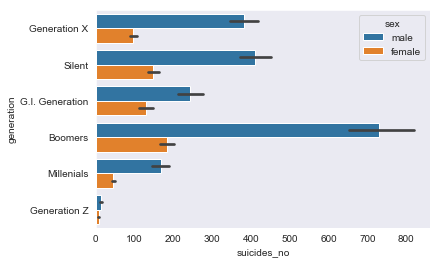

In [26]:
sns.set_style('dark')
sns.barplot(x = 'suicides_no', y="generation", hue="sex", data=df)
plt.show()

In [9]:
print (df.generation.unique())

['Generation X' 'Silent' 'G.I. Generation' 'Boomers' 'Millenials'
 'Generation Z']


In [10]:
print (df.country.unique())

['Albania' 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Aruba' 'Australia'
 'Austria' 'Azerbaijan' 'Bahamas' 'Bahrain' 'Barbados' 'Belarus' 'Belgium'
 'Belize' 'Bosnia and Herzegovina' 'Brazil' 'Bulgaria' 'Cabo Verde'
 'Canada' 'Chile' 'Colombia' 'Costa Rica' 'Croatia' 'Cuba' 'Cyprus'
 'Czech Republic' 'Denmark' 'Dominica' 'Ecuador' 'El Salvador' 'Estonia'
 'Fiji' 'Finland' 'France' 'Georgia' 'Germany' 'Greece' 'Grenada'
 'Guatemala' 'Guyana' 'Hungary' 'Iceland' 'Ireland' 'Israel' 'Italy'
 'Jamaica' 'Japan' 'Kazakhstan' 'Kiribati' 'Kuwait' 'Kyrgyzstan' 'Latvia'
 'Lithuania' 'Luxembourg' 'Macau' 'Maldives' 'Malta' 'Mauritius' 'Mexico'
 'Mongolia' 'Montenegro' 'Netherlands' 'New Zealand' 'Nicaragua' 'Norway'
 'Oman' 'Panama' 'Paraguay' 'Philippines' 'Poland' 'Portugal'
 'Puerto Rico' 'Qatar' 'Republic of Korea' 'Romania' 'Russian Federation'
 'Saint Kitts and Nevis' 'Saint Lucia' 'Saint Vincent and Grenadines'
 'San Marino' 'Serbia' 'Seychelles' 'Singapore' 'Slovakia' 'Slovenia'
 'South 

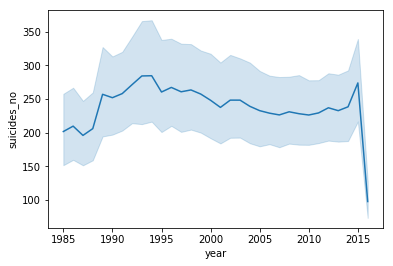

In [20]:

ax = sns.lineplot(x="year", y="suicides_no", data=df)

In [11]:
print (df.age.unique())

['15-24 years' '35-54 years' '75+ years' '25-34 years' '55-74 years'
 '5-14 years']


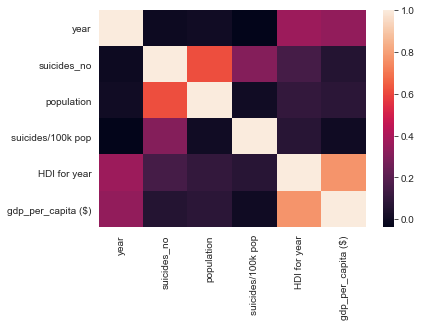

In [13]:
sns.heatmap(df.corr())

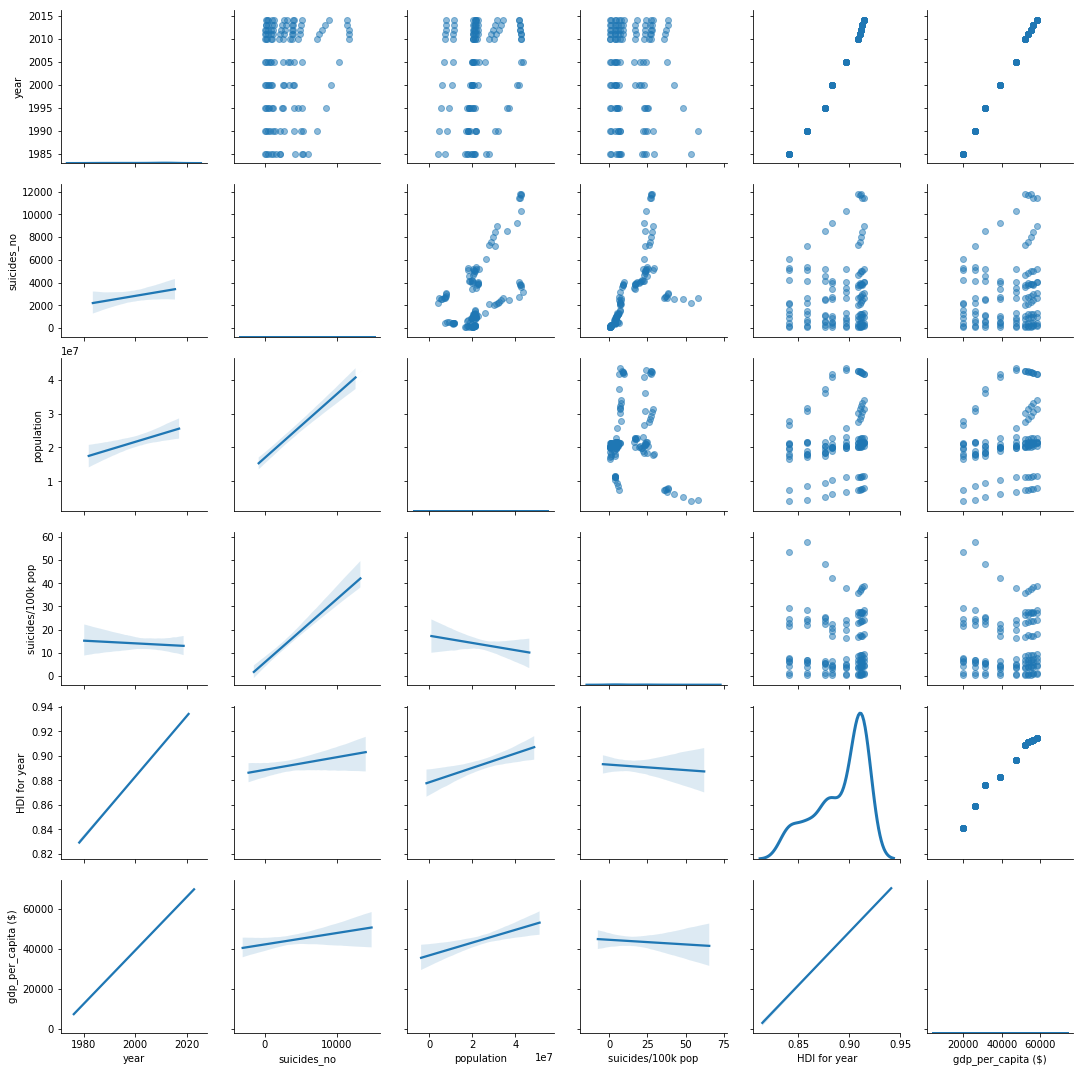

In [6]:
df_US = df.loc[((df['country']=='United States'))]

jitter = pd.DataFrame(np.random.uniform(-.3, .3, size=(df_US.shape)), columns = df_US.columns)

df_jittered = df_US.add(jitter)

g = sns.PairGrid(df_US.dropna())
g.map_upper(plt.scatter, alpha=.5)
g.map_lower(sns.regplot, scatter_kws=dict(alpha=0))
g.map_diag(sns.kdeplot, lw=3)
plt.show()

In [19]:
#Feature 1 = America vs not america. Just trying to get a handle on how to create features
features = pd.get_dummies(df['country'])

features['American'] =np.where((df['country'] == 'United States'), 0, 1)

print (pd.crosstab(features['American'], df['country']))


country   Albania  Antigua and Barbuda  Argentina  Armenia  Aruba  Australia  \
American                                                                       
0               0                    0          0        0      0          0   
1             264                  324        372      298    168        360   

country   Austria  Azerbaijan  Bahamas  Bahrain     ...      Thailand  \
American                                            ...                 
0               0           0        0        0     ...             0   
1             382         192      276      252     ...           334   

country   Trinidad and Tobago  Turkey  Turkmenistan  Ukraine  \
American                                                       
0                           0       0             0        0   
1                         324      84           348      336   

country   United Arab Emirates  United Kingdom  United States  Uruguay  \
American                                               

In [16]:
print (df.year.unique())


[1987 1988 1989 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002
 2003 2004 2005 2006 2007 2008 2009 2010 1985 1986 1990 1991 2012 2013
 2014 2015 2011 2016]


In [17]:
#Feature 2: the 2000s. Suicides seem to show greater variance and increase with time based on the Pair Grid

df['2000s']= np.where((df['year']>=2000), 0, 1)

print (df['year'].groupby(df['2000s']).describe())

         count         mean       std     min     25%     50%     75%     max
2000s                                                                        
0      16168.0  2007.377783  4.581317  2000.0  2003.0  2007.0  2011.0  2016.0
1      11652.0  1992.767250  4.250026  1985.0  1989.0  1993.0  1996.0  1999.0


In [18]:
print (df.age.unique())

['15-24 years' '35-54 years' '75+ years' '25-34 years' '55-74 years'
 '5-14 years']


In [8]:
#Feature 3: juvenile/young adult. Just playing with engineering capabilities/syntax
features = pd.get_dummies(df['age'])

features['juvenile']=np.where((df['age'].isin(['5-14 years','15-24 years'])), 0,1)

print (pd.crosstab(features['juvenile'], df['age']))

age       15-24 years  25-34 years  35-54 years  5-14 years  55-74 years  \
juvenile                                                                   
0                4642            0            0        4610            0   
1                   0         4642         4642           0         4642   

age       75+ years  
juvenile             
0                 0  
1              4642  


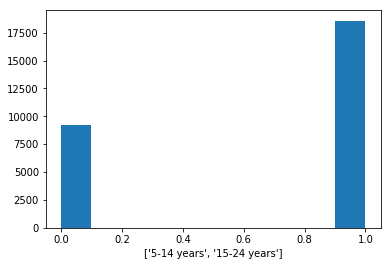

In [13]:
plt.hist(features['juvenile'])
plt.xlabel(['5-14 years', '15-24 years'])
plt.show()


In [24]:
print (features['juvenile'].describe())

count    27820.000000
mean         0.667434
std          0.471141
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: juvenile, dtype: float64


In [25]:
#Feature 4: Investigating generation/sex

features=pd.get_dummies(df['generation'])

features['generation_sex'] = np.where((df['generation']=='Generation X' and df['sex']== 'male'), 0, 1)

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().